In [2]:
import numpy as np
np.random.seed(123)

import matplotlib.pyplot as plt

import keras
from keras.models import Sequential, Model
from keras.utils.vis_utils import model_to_dot
from keras.layers import Input, Dense, Dropout,Embedding,concatenate,Flatten
from keras.optimizers import RMSprop
from keras.utils import plot_model

import configparser
import os

from IPython.display import SVG

config = configparser.ConfigParser()
config.read('../../config.ini')

data_dir = config['PATHS']['json-export']
input_dir = data_dir+'feature_arrays/'
output_dir = data_dir + 'models/'
output_dir_test = data_dir + 'test_predictions/'

batch_size = 128
num_classes = 11
epochs = 25
input_dim = 4096

for path in [output_dir, output_dir_test]:
    if not os.path.isdir(path):
        os.mkdir(path)
        print ('Pfad {path} angelegt'.format(path=path))

# the data, split between train and test sets
input_file = 'vgg16_features.npz'
print ('input dir:', input_file)
import_arrays = np.load(input_dir+input_file, allow_pickle=True)

# exclude 1st column from every array (contains id)
x_train = import_arrays['train_x'][:,1:]
y_train = import_arrays['train_y'][:,1:]
x_test = import_arrays['dev_x'][:,1:]
y_test = import_arrays['dev_y'][:,1:]

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

Using TensorFlow backend.


input dir: vgg16_features.npz
110000 train samples
18051 test samples


In [3]:
input_file = 'type_to_color_resampled.npz'
print ('input file:', input_file)
import_arrays_types = np.load(input_dir+input_file, allow_pickle=True)

# exclude 1st column from every array (contains id)
types_train = import_arrays_types['train_x'][:,1:]
types_test = import_arrays_types['dev_x'][:,1:]

input file: type_to_color_resampled.npz


In [4]:
def prediction(model,input_dev,output_dev,input_test,output_test,filename):
    predict_dev_y = model.predict(input_dev)
    predict_test_y = model.predict(input_test)
    np.savez_compressed(filename,
        dev_y = output_dev,
        test_y = output_test,
        predict_dev_y = predict_dev_y,
        predict_test_y = predict_test_y
        )

# keine Hidden-Layer

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 4096)              0         
_________________________________________________________________
predictions (Dense)          (None, 11)                45067     
Total params: 45,067
Trainable params: 45,067
Non-trainable params: 0
_________________________________________________________________
Train on 110000 samples, validate on 18051 samples
Epoch 1/25
110000/110000 [==============================] - 2s 20us/step - loss: 2.0198 - acc: 0.3761 - val_loss: 2.1332 - val_acc: 0.3546
Epoch 2/25
110000/110000 [==============================] - 2s 21us/step - loss: 1.7893 - acc: 0.4322 - val_loss: 2.0680 - val_acc: 0.3826
Epoch 3/25
110000/110000 [==============================] - 2s 21us/step - loss: 1.7122 - acc: 0.4556 - val_loss: 2.0319 - val_acc: 0.3840
Epoch 4/25
110000/110000 [==============================] - 2s 21u

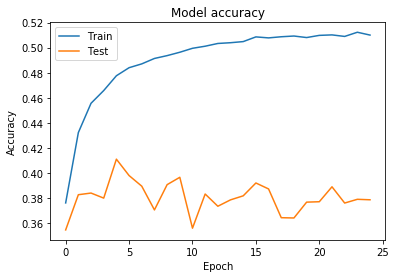

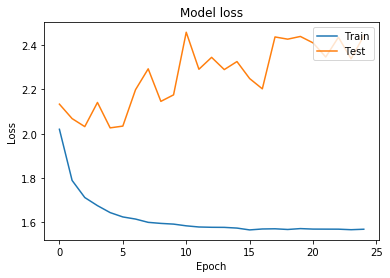

In [9]:
# Inputs
inputs = Input(shape=(input_dim,), name='input')
predictions = Dense(num_classes, activation='softmax', name='predictions')(inputs)

model = Model(inputs=inputs, outputs=predictions)

model.summary()
SVG(model_to_dot(model,show_shapes=True,show_layer_names=False,rankdir='TB').create(prog='dot', format='svg'))


model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


# 240 Relu, 1* Dropout (0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 4096)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 240)               983280    
_________________________________________________________________
dropout_6 (Dropout)          (None, 240)               0         
_________________________________________________________________
predictions (Dense)          (None, 11)                2651      
Total params: 985,931
Trainable params: 985,931
Non-trainable params: 0
_________________________________________________________________
Train on 110000 samples, validate on 18051 samples
Epoch 1/25
110000/110000 [==============================] - 9s 83us/step - loss: 1.8593 - acc: 0.3861 - val_loss: 1.7594 - val_acc: 0.4119
Epoch 2/25
110000/110000 [==============================] - 9s 81us/step - los

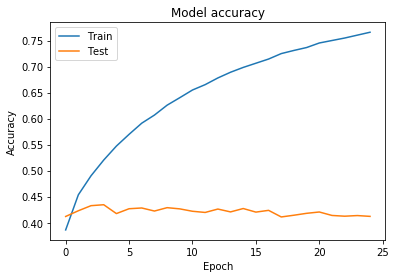

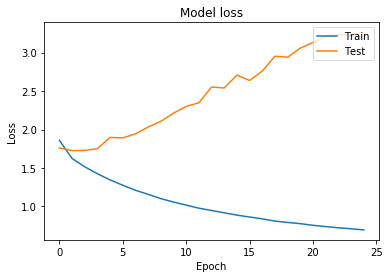

In [6]:
# Inputs
inputs = Input(shape=(input_dim,))
x = Dense(240, activation='relu')(inputs)
x = Dropout(0.2)(x)

predictions = Dense(num_classes, activation='softmax', name='predictions')(x)

model = Model(inputs=inputs, outputs=predictions)

model.summary()
SVG(model_to_dot(model,show_shapes=True,show_layer_names=False,rankdir='TB').create(prog='dot', format='svg'))


model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


# 240 Relu, 24 Relu, 2* Dropout (0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 4096)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 240)               983280    
_________________________________________________________________
dropout_7 (Dropout)          (None, 240)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 24)                5784      
_________________________________________________________________
dropout_8 (Dropout)          (None, 24)                0         
_________________________________________________________________
predictions (Dense)          (None, 11)                275       
Total params: 989,339
Trainable params: 989,339
Non-trainable params: 0
_________________________________________________________________
Trai

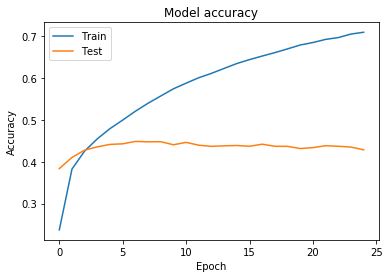

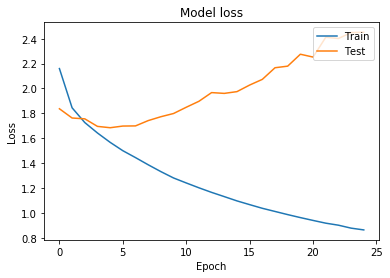

In [7]:
# Inputs
inputs = Input(shape=(input_dim,))
x = Dense(240, activation='relu')(inputs)
x = Dropout(0.2)(x)
x = Dense(24, activation='relu')(x) 
x = Dropout(0.2)(x)

predictions = Dense(num_classes, activation='softmax', name='predictions')(x)

model = Model(inputs=inputs, outputs=predictions)

model.summary()
SVG(model_to_dot(model,show_shapes=True,show_layer_names=False,rankdir='TB').create(prog='dot', format='svg'))


model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


# 240 Relu, 24 Softmax, 0.2 Dropout

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 4096)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 240)               983280    
_________________________________________________________________
dropout_9 (Dropout)          (None, 240)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 24)                5784      
_________________________________________________________________
dropout_10 (Dropout)         (None, 24)                0         
_________________________________________________________________
predictions (Dense)          (None, 11)                275       
Total params: 989,339
Trainable params: 989,339
Non-trainable params: 0
_________________________________________________________________
Trai

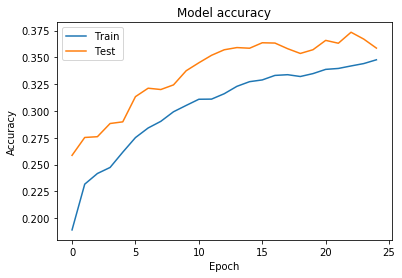

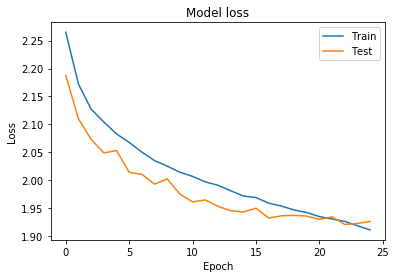

In [8]:
# Inputs
inputs = Input(shape=(input_dim,))
x = Dense(240, activation='relu')(inputs)
x = Dropout(0.2)(x)
x = Dense(24, activation='softmax')(x) 
x = Dropout(0.2)(x)

predictions = Dense(num_classes, activation='softmax', name='predictions')(x)

model = Model(inputs=inputs, outputs=predictions)

model.summary()
SVG(model_to_dot(model,show_shapes=True,show_layer_names=False,rankdir='TB').create(prog='dot', format='svg'))


model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


# KANDIDAT

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 4096)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 4096)              0         
_________________________________________________________________
classes (Dense)              (None, 872)               3572584   
_________________________________________________________________
dropout_6 (Dropout)          (None, 872)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 240)               209520    
_________________________________________________________________
dropout_7 (Dropout)          (None, 240)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                5784      
__________

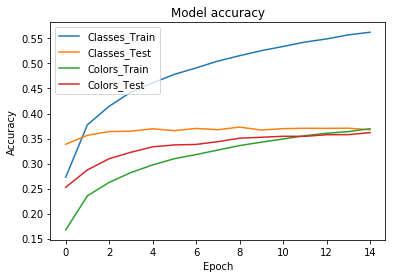

In [6]:
# Inputs
inputs = Input(shape=(input_dim,))
x = Dropout(0.2)(inputs)
object_predictions = Dense(872, activation='softmax', name='classes')(x)
x = Dropout(0.2)(object_predictions)
x = Dense(240, activation='relu')(x) 
x = Dropout(0.2)(x)
x = Dense(24, activation='relu')(x) 
x = Dropout(0.2)(x)
color_predictions = Dense(num_classes, activation='softmax', name='colors')(x)

model = Model(inputs=inputs, outputs=[object_predictions, color_predictions])

model.summary()
SVG(model_to_dot(model,show_shapes=True,show_layer_names=False,rankdir='TB').create(prog='dot', format='svg'))


model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['accuracy'])

history = model.fit(x_train, [types_train, y_train],
                    batch_size=batch_size,
                    epochs=15,
                    verbose=1,
                    validation_data=(x_test, [types_test, y_test]))

# Plot training & validation accuracy values
plt.plot(history.history['classes_acc'])
plt.plot(history.history['val_classes_acc'])
plt.plot(history.history['colors_acc'])
plt.plot(history.history['val_colors_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Classes_Train','Classes_Test','Colors_Train','Colors_Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['classes_loss'])
plt.plot(history.history['val_classes_loss'])
plt.plot(history.history['colors_loss'])
plt.plot(history.history['val_colors_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Classes_Train','Classes_Test','Colors_Train','Colors_Test'], loc='upper right')
plt.show()

filename = output_dir_test+'VGG16_ClassesOnTheFly0.npz'

np.savez_compressed(filename,
    dev_y = import_arrays['dev_y'],
    test_y = import_arrays['test_y'],
    predict_dev_y = model.predict(import_arrays['dev_x'][:,1:])[1],
    predict_test_y = model.predict(import_arrays['test_x'][:,1:])[1]
    )

In [7]:
# Inputs
inputs = Input(shape=(input_dim,))
x_obj = Dropout(0.2)(inputs)
object_predictions = Dense(872, activation='softmax', name='classes')(x_obj)
x_col = Dense(240, activation='relu')(inputs) 
x_col = Dropout(0.2)(x_col)
x_col = Dense(24, activation='relu')(x_col) 
x_col = Dropout(0.2)(x_col)
color_predictions = Dense(num_classes, activation='softmax', name='colors')(x_col)

model = Model(inputs=inputs, outputs=[object_predictions, color_predictions])

model.summary()
SVG(model_to_dot(model,show_shapes=True,show_layer_names=False,rankdir='TB').create(prog='dot', format='svg'))


model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['accuracy'])

history = model.fit(x_train, [types_train, y_train],
                    batch_size=batch_size,
                    epochs=15,
                    verbose=1,
                    validation_data=(x_test, [types_test, y_test]))

# Plot training & validation accuracy values
plt.plot(history.history['classes_acc'])
plt.plot(history.history['val_classes_acc'])
plt.plot(history.history['colors_acc'])
plt.plot(history.history['val_colors_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Classes_Train','Classes_Test','Colors_Train','Colors_Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['classes_loss'])
plt.plot(history.history['val_classes_loss'])
plt.plot(history.history['colors_loss'])
plt.plot(history.history['val_colors_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Classes_Train','Classes_Test','Colors_Train','Colors_Test'], loc='upper right')
plt.show()

filename = output_dir_test+'VGG16_ClassesOnTheFly1.npz'

np.savez_compressed(filename,
    dev_y = import_arrays['dev_y'],
    test_y = import_arrays['test_y'],
    predict_dev_y = model.predict(import_arrays['dev_x'][:,1:])[1],
    predict_test_y = model.predict(import_arrays['test_x'][:,1:])[1]
    )

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 4096)         0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 240)          983280      input_3[0][0]                    
__________________________________________________________________________________________________
dropout_10 (Dropout)            (None, 240)          0           dense_5[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 24)           5784        dropout_10[0][0]                 
__________________________________________________________________________________________________
dropout_9 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 4096)         0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 240)          983280      input_4[0][0]                    
__________________________________________________________________________________________________
dropout_12 (Dropout)            (None, 240)          0           dense_7[0][0]                    
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 24)           5784        dropout_12[0][0]                 
__________________________________________________________________________________________________
dropout_13

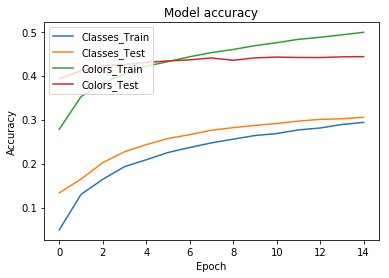

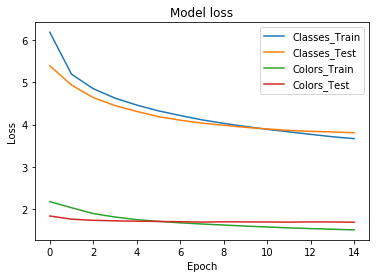

In [8]:
# Inputs
inputs = Input(shape=(input_dim,))
x = Dense(240, activation='relu')(inputs) 
x = Dropout(0.2)(x)
x = Dense(24, activation='relu')(x) 
x = Dropout(0.2)(x)
object_predictions = Dense(872, activation='softmax', name='classes')(x)
color_predictions = Dense(num_classes, activation='softmax', name='colors')(x)

model = Model(inputs=inputs, outputs=[object_predictions, color_predictions])

model.summary()
SVG(model_to_dot(model,show_shapes=True,show_layer_names=False,rankdir='TB').create(prog='dot', format='svg'))


model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['accuracy'])

history = model.fit(x_train, [types_train, y_train],
                    batch_size=batch_size,
                    epochs=15,
                    verbose=1,
                    validation_data=(x_test, [types_test, y_test]))

# Plot training & validation accuracy values
plt.plot(history.history['classes_acc'])
plt.plot(history.history['val_classes_acc'])
plt.plot(history.history['colors_acc'])
plt.plot(history.history['val_colors_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Classes_Train','Classes_Test','Colors_Train','Colors_Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['classes_loss'])
plt.plot(history.history['val_classes_loss'])
plt.plot(history.history['colors_loss'])
plt.plot(history.history['val_colors_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Classes_Train','Classes_Test','Colors_Train','Colors_Test'], loc='upper right')
plt.show()

filename = output_dir_test+'VGG16_ClassesOnTheFly2.npz'

np.savez_compressed(filename,
    dev_y = import_arrays['dev_y'],
    test_y = import_arrays['test_y'],
    predict_dev_y = model.predict(import_arrays['dev_x'][:,1:])[1],
    predict_test_y = model.predict(import_arrays['test_x'][:,1:])[1]
    )

# ENDE KANDIDAT

# Simples Vergleichs-Modell (240+24 ReLu)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 4096)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 240)               983280    
_________________________________________________________________
dropout_52 (Dropout)         (None, 240)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 24)                5784      
_________________________________________________________________
dropout_53 (Dropout)         (None, 24)                0         
_________________________________________________________________
predictions (Dense)          (None, 11)                275       
Total params: 989,339
Trainable params: 989,339
Non-trainable params: 0
_________________________________________________________________
Trai

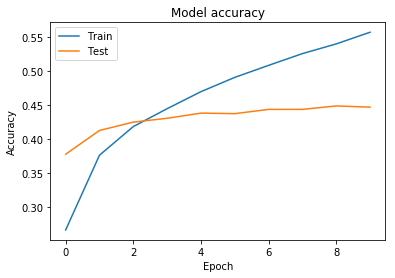

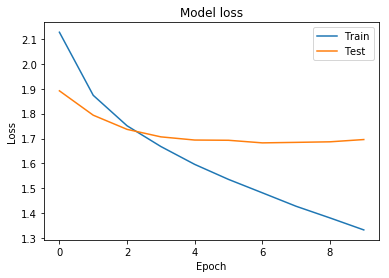

In [22]:
# Inputs
inputs = Input(shape=(input_dim,))
#x = Dropout(0.2)(inputs)
x = Dense(240, activation='relu')(inputs)
x = Dropout(0.2)(x)
x = Dense(24, activation='relu')(x) 
x = Dropout(0.2)(x)

predictions = Dense(num_classes, activation='softmax', name='predictions')(x)

model = Model(inputs=inputs, outputs=predictions)

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

filename = output_dir_test+'VGG16_simple.npz'
prediction(model,import_arrays['dev_x'][:,1:],import_arrays['dev_y'],import_arrays['test_x'][:,1:],import_arrays['test_y'],filename)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 4096)              0         
_________________________________________________________________
predictions (Dense)          (None, 1000)              4097000   
_________________________________________________________________
dense_3 (Dense)              (None, 24)                24024     
_________________________________________________________________
dropout_3 (Dropout)          (None, 24)                0         
_________________________________________________________________
colors (Dense)               (None, 11)                275       
Total params: 4,121,299
Trainable params: 4,121,299
Non-trainable params: 0
_________________________________________________________________
Train on 110000 samples, validate on 18051 samples
Epoch 1/10
110000/110000 [==============================] - 38s 345us/step - loss

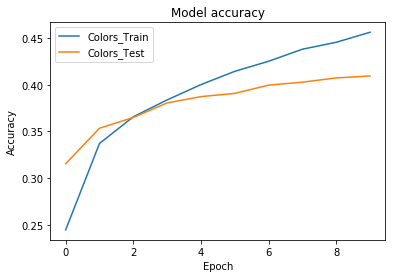

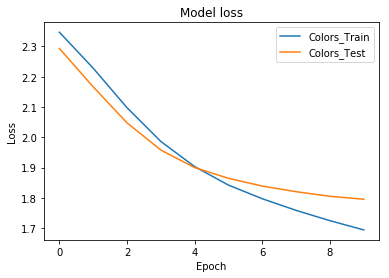

In [7]:
from keras.applications.vgg16 import VGG16
vgg_prediction_layer = VGG16().layers[-1]

# Inputs
inputs = Input(shape=(input_dim,))
object_predictions = vgg_prediction_layer(inputs)
x = Dense(24, activation='relu')(object_predictions) 
x = Dropout(0.2)(x)
color_predictions = Dense(num_classes, activation='softmax', name='colors')(x)

model = Model(inputs=inputs, outputs=color_predictions)

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Colors_Train','Colors_Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Colors_Train','Colors_Test'], loc='upper right')
plt.show()

filename = output_dir_test+'VGG16_Pred_2.npz'
prediction(model,import_arrays['dev_x'][:,1:],import_arrays['dev_y'],import_arrays['test_x'][:,1:],import_arrays['test_y'],filename)